In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\Dell\\Capstone Project'

In [3]:
os.chdir('C:\\Users\\Dell')

In [4]:
os.getcwd()

'C:\\Users\\Dell'

# Predictive Analysis / Model Building

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
df=pd.read_csv("BMI.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [45]:
df.shape

(500, 4)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null object
Height    500 non-null int64
Weight    500 non-null int64
Index     500 non-null int64
dtypes: int64(3), object(1)
memory usage: 13.7+ KB


In [48]:
df["Index"].unique()

array([4, 2, 3, 5, 1, 0], dtype=int64)

In [49]:
bins=(-1,0,1,2,3,4,5)                                #To convert a Column from Numeric to Categorical
health=["Malnourished","Underweight","Fit","Slightly overwieght","Overweight","Extremely overweight"]
df["Index"]=pd.cut(df["Index"] , bins=bins , labels=health)

In [50]:
df

,Gender,Height,Weight,Index
0,Male,174,96,Overweight
1,Male,189,87,Fit
2,Female,185,110,Overweight
3,Female,195,104,Slightly overwieght
4,Male,149,61,Slightly overwieght
...,...,...,...,...
495,Female,150,153,Extremely overweight
496,Female,184,121,Overweight
497,Female,141,136,Extremely overweight
498,Male,150,95,Extremely overweight


In [51]:
df["Index"].value_counts()

Extremely overweight    198
Overweight              130
Fit                      69
Slightly overwieght      68
Underweight              22
Malnourished             13
Name: Index, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

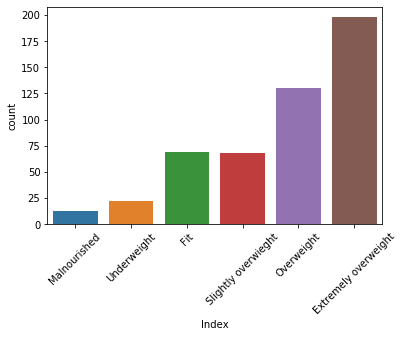

In [55]:
sns.countplot(x="Index",data=df)
plt.xticks(rotation=45)
plt.show

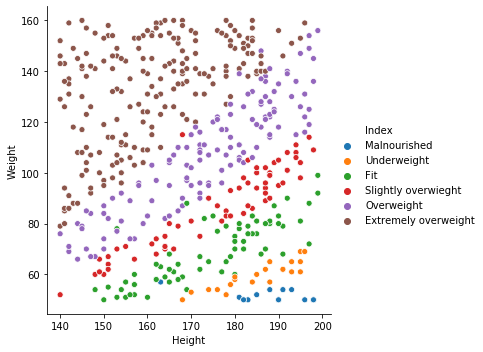

In [56]:
sns.relplot(x="Height",y="Weight",hue="Index",data=df,kind="scatter")
plt.show()

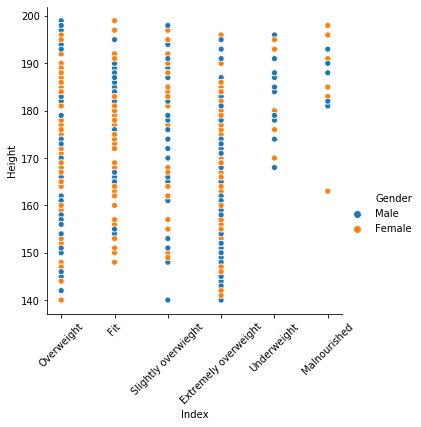

In [60]:
sns.relplot(x="Index",y="Height",hue="Gender",data=df,kind="scatter")
plt.xticks(rotation=45)
plt.show()

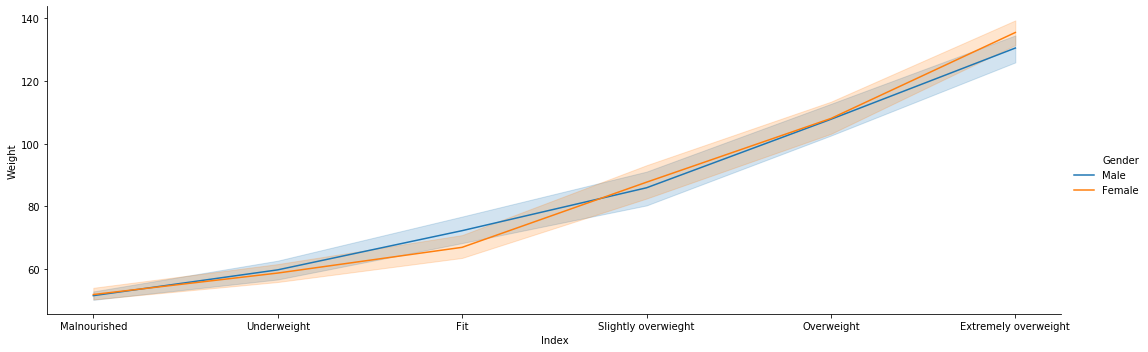

In [63]:
sns.relplot(x="Index",y="Weight",hue="Gender",data=df,kind="line",height=5,aspect=3)
plt.show()

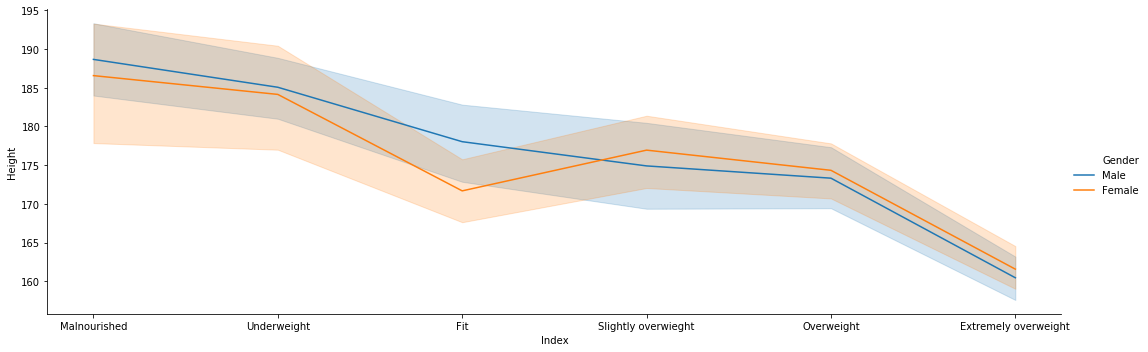

In [65]:
sns.relplot(x="Index",y="Height",hue="Gender",data=df,kind="line",height=5,aspect=3)
plt.show()

Step 1

In [66]:
X=df.drop(columns=["Index"])

In [67]:
X.head()

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61


In [68]:
y=df["Index"]

In [69]:
y.head()

0             Overweight
1                    Fit
2             Overweight
3    Slightly overwieght
4    Slightly overwieght
Name: Index, dtype: category
Categories (6, object): [Malnourished < Underweight < Fit < Slightly overwieght < Overweight < Extremely overweight]

Rules

In [70]:
X.dtypes

Gender    object
Height     int64
Weight     int64
dtype: object

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
label=LabelEncoder()

In [73]:
X["Gender"]=label.fit_transform(X["Gender"])

In [75]:
X.dtypes

Gender    int32
Height    int64
Weight    int64
dtype: object

In [76]:
type(X)

pandas.core.frame.DataFrame

In [77]:
X.shape

(500, 3)

In [78]:
X.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

Step 2

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

Feature Scaling on Training Dataset

In [82]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [83]:
X_scaled_train = SS.fit_transform(X_train)

In [86]:
X_scaled_train = pd.DataFrame(X_scaled_train)

In [87]:
X_scaled_train.head()

,0,1,2
0,1.020204,-1.735859,-0.789402
1,-0.980196,-1.066993,1.494023
2,1.020204,1.182828,-0.048831
3,-0.980196,-0.398127,1.494023
4,-0.980196,-1.371023,0.630025


Feature Scaling on Testing Dataset

In [88]:
X_scaled_test = SS.transform(X_test)

In [89]:
X_scaled_test = pd.DataFrame(X_scaled_test)

In [90]:
X_scaled_test.head()

,0,1,2
0,-0.980196,-0.762963,-1.221401
1,1.020204,1.061216,1.062024
2,1.020204,-1.127799,-1.344829
3,-0.980196,-0.154903,-0.820259
4,1.020204,0.635574,-1.005401


Step 3

In [91]:
from sklearn.svm import SVC

In [128]:
svc=SVC(kernel="rbf",degree=2)

In [129]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Step 4

In [130]:
y_pred=svc.predict(X_test)

In [131]:
svc.score(X_test,y_test)

0.59

In [132]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [133]:
print(classification_report(y_test,y_pred))

                      precision    recall  f1-score   support

Extremely overweight       0.51      0.97      0.67        39
                 Fit       0.67      0.29      0.40        14
        Malnourished       0.00      0.00      0.00         3
          Overweight       0.85      0.42      0.56        26
 Slightly overwieght       1.00      0.36      0.53        14
         Underweight       1.00      0.25      0.40         4

            accuracy                           0.59       100
           macro avg       0.67      0.38      0.43       100
        weighted avg       0.69      0.59      0.55       100



In [134]:
print(confusion_matrix(y_test,y_pred))

[[38  0  0  1  0  0]
 [ 9  4  0  1  0  0]
 [ 2  1  0  0  0  0]
 [14  1  0 11  0  0]
 [ 9  0  0  0  5  0]
 [ 3  0  0  0  0  1]]


In [135]:
print(accuracy_score(y_test,y_pred))

0.59


Predict on New Observations

In [136]:
a=[[1,150,5]]
a=SS.transform(a)

In [138]:
svc.predict([[0,150,45]])

array(['Extremely overweight'], dtype=object)